In [10]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [11]:
actions = ['me','you','hand_sign', 'hi', 'everyone']

data = np.concatenate([
     
     np.load('D:/캡스톤 연습/net_test2/seq_me_1697005956.npy'),
     np.load('D:/캡스톤 연습/net_test2/seq_you_1697005956.npy'),
     np.load('D:/캡스톤 연습/net_test2/seq_hand_sign_1697005956.npy'),
     np.load('D:/캡스톤 연습/net_test2/seq_hi_1697005956.npy'),
     np.load('D:/캡스톤 연습/net_test2/seq_everyone_1697005956.npy'),


], axis=0)

data.shape

(1723, 30, 104)

In [12]:
x_data = data[:,:, :-1] #라벨 값만 빼고 x_data로 만듦
labels = data[:,0,-1] #마지막 값이 라벨이므로 마지막 값만 라벨로 만듬

print(x_data.shape)
print(labels.shape)

(1723, 30, 103)
(1723,)


In [13]:
from keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(1723, 5)

In [14]:
from sklearn.model_selection import train_test_split
# training set과 testset을 나눔

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1550, 30, 103) (1550, 5)
(173, 30, 103) (173, 5)


In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                43008     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 45,253
Trainable params: 45,253
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[
        ModelCheckpoint('models/model6.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
46/49 [===========================>..] - ETA: 0s - loss: 69.7924 - acc: 0.2147
Epoch 1: val_acc improved from -inf to 0.52601, saving model to models\model6.h5
49/49 [==============================] - 2s 21ms/step - loss: 67.4664 - acc: 0.2316 - val_loss: 28.0412 - val_acc: 0.5260 - lr: 0.0010
Epoch 2/100
46/49 [===========================>..] - ETA: 0s - loss: 21.1556 - acc: 0.5897
Epoch 2: val_acc did not improve from 0.52601
49/49 [==============================] - 1s 13ms/step - loss: 21.2874 - acc: 0.5877 - val_loss: 32.7938 - val_acc: 0.4682 - lr: 0.0010
Epoch 3/100
45/49 [==========================>...] - ETA: 0s - loss: 22.7956 - acc: 0.6243
Epoch 3: val_acc improved from 0.52601 to 0.65318, saving model to models\model6.h5
49/49 [==============================] - 1s 13ms/step - loss: 22.4254 - acc: 0.6265 - val_loss: 11.7742 - val_acc: 0.6532 - lr: 0.0010
Epoch 4/100
45/49 [==========================>...] - ETA: 0s - loss: 7.3780 - acc: 0.7514
Epoch 4: val_acc impr

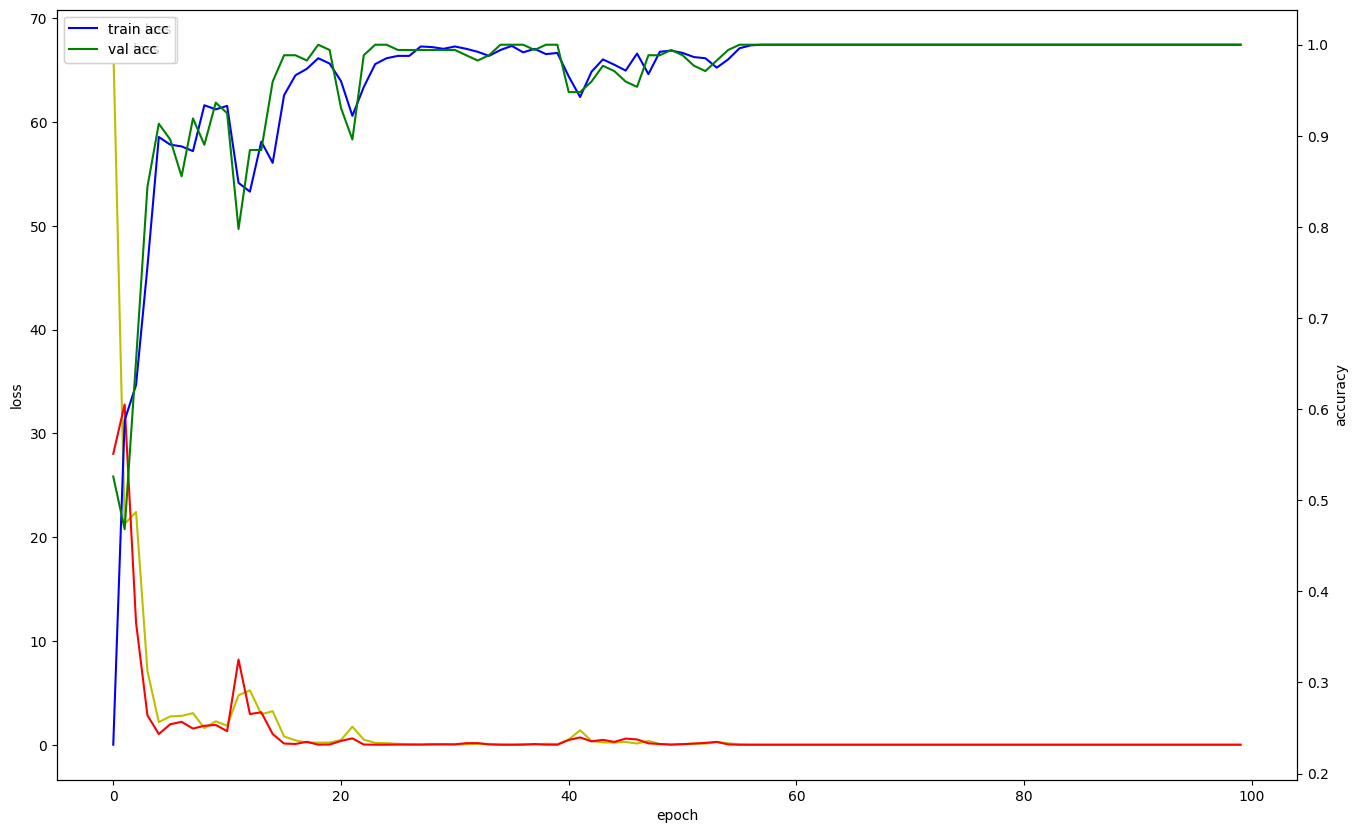

In [17]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()